In [1]:
from display import displayFigures
from include.build_synth import buildData_fromRO as build_U
from include.build_synth import buildData_fromROSpatCorr as build_M
from include.build_synth import loadRO as load

### Choice of Rref and Oref (univariate)
Here is the list of the configurations available in data/Synthetic/Univariate, giving ground truths for R and O for each.
* Configuration `'I'`&ensp;&ensp;&ensp;: faster dynamic changes and a lot of outliers
* Configuration `'II'`&ensp;&ensp;: slower dynamic changes and fewer outliers
* Configuration `'III'`&ensp;: faster dynamic changes and fewer outliers
* Configuration `'IV'`&ensp;&ensp;: slower dynamic changes and a lot of outliers

In [2]:
# Choice of configuration
configuration = 'I'

RTrue, OTrue = load.loadROconfig(configuration)

### Building synthetic data following Cori's extended model
Given `firstCases` initial number of cases for day 1, loaded $\mathsf{R}^{\mathsf{true}}$ and $\mathsf{O}^{\mathsf{true}}$, build synthetic dates `datesBuilt` and data $\mathsf{Z}$ (`ZDataBuilt`) drawn following Cori's extended model:

For each day $t$, $\mathsf{Z}_t$ is drawn according to a Poisson law of parameter $\mathsf{R}^{\mathsf{true}}_t.(\Phi\star\mathsf{Z})_t + \mathsf{O}^{\mathsf{true}}_t$ where $\Phi$ is the contagiosity.

C:\Users\juliana\Documents\GitHub\Covid-R-estim\display\displayFigures.py:211: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


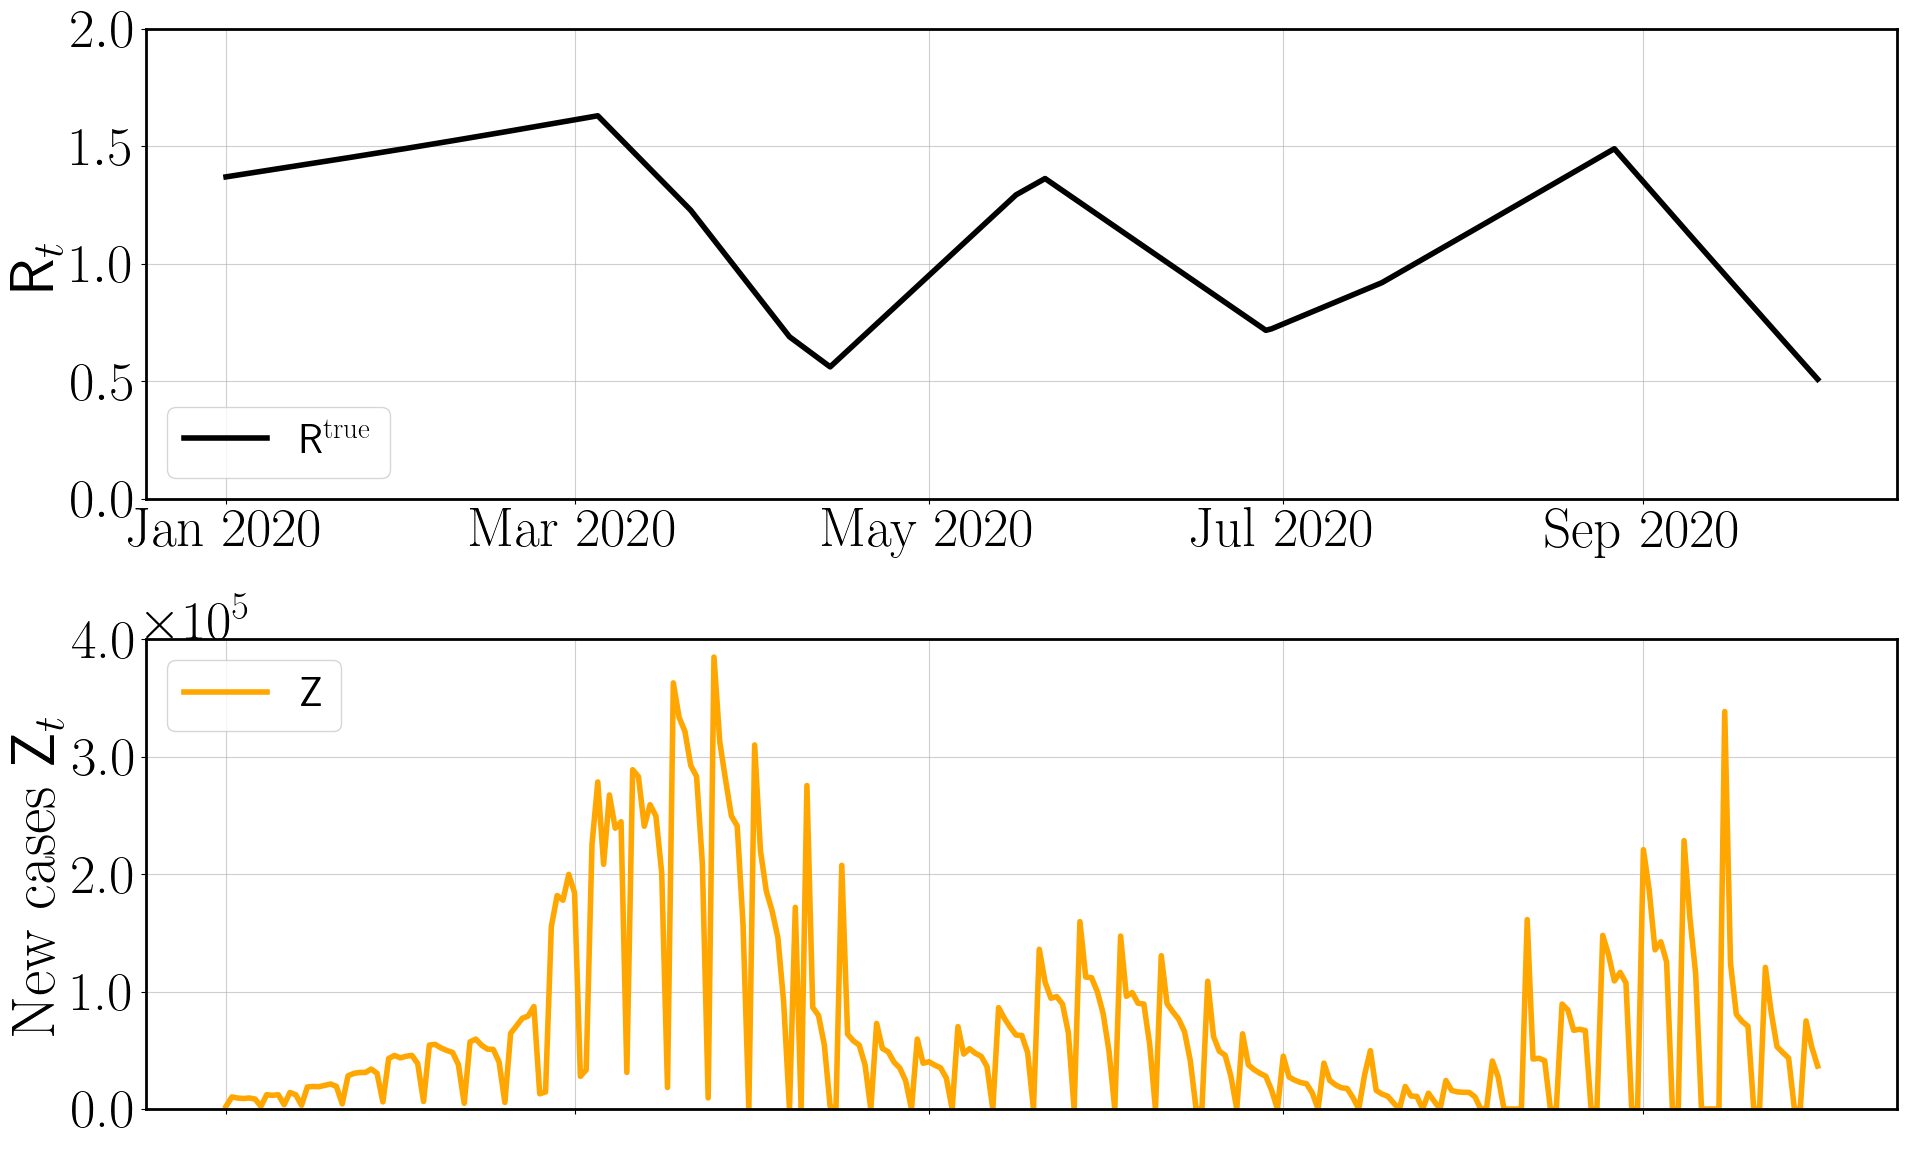

In [3]:
# Choice of number of first cases on day one
firstCases = 2000

# Build synthetic data based on RTrue, OTrue and chosen firstCases
datesBuilt, ZDataBuilt = build_U.buildData_anyRO(RTrue, OTrue, firstCases)

# Display data built
fig, axes, formattedDatesBuilt = displayFigures.display_dataBuilt(datesBuilt, ZDataBuilt, RTrue, OTrue)

### Choice of Rref and Oref (multivariate)
Here is the list of the configurations available in data/Synthetic/Multivariate, giving ground truths for R and O for each.
* Line graph
* Hub graph

each containing configurations associated to various inter-county correlated ground truths $\boldsymbol{\mathsf{R}}^\star$. Given $\boldsymbol{\mathsf{R}}^\dagger$ which can be found in `Config_delta_0'`&ensp; they are computed via a Tikhonov regularization as:

$$\boldsymbol{\mathsf{R}}^\star (\boldsymbol{\mathsf{R}}^\dagger; \delta) = \underset{\boldsymbol{\mathsf{R}} \in \mathbb{R}^{C\times T}}{\mathrm{argmin}} \, \lVert \boldsymbol{\mathsf{R}}^\dagger - \boldsymbol{\mathsf{R}}\rVert_2^2 +  \delta  \lVert \mathsf{G} \boldsymbol{\mathsf{R}}\rVert_2^2$$

and storaged in `Config_delta_I'`&ensp; `Config_delta_II'`&ensp; `Config_delta_III'`&ensp; `Config_delta_IV'`&ensp; respectively corresponding to $\delta_{\mathtt{I}}$, $\delta_{\mathtt{II}}$, $\delta_{\mathtt{III}}$, $\delta_{\mathtt{IV}}$ defined in the associated article. Each of their value can be found in their associated `.mat` file, using the key `deltaValue`.